## Loading of datasets and importing modules

In [1]:
import pandas as pd

# Define file paths (update the paths if they differ in your project)
books_file = 'P505/Books.csv'
ratings_file = 'P505/Ratings.csv'
users_file = 'P505/Users.csv'

In [2]:
# Load datasets with specified dtype for column 3 in books_file
print("Loading datasets...")
books_df = pd.read_csv(books_file, encoding='latin-1', dtype={3: str})
ratings_df = pd.read_csv(ratings_file, encoding='latin-1')
users_df = pd.read_csv(users_file, encoding='latin-1')

Loading datasets...


In [3]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


## Data Cleaning for Users Dataset

In [8]:
print("\nCleaning Users dataset...")

# Convert 'User-ID' to string for consistency
if 'User-ID' in users_df.columns:
    users_df['User-ID'] = users_df['User-ID'].astype(str)


Cleaning Users dataset...


In [9]:
# Impute missing Age:
if 'Age' in users_df.columns:
    # Calculate median age ignoring missing values
    median_age = users_df['Age'].median()
    print(f"Imputing missing Age values with median: {median_age}")
    users_df['Age'] = users_df['Age'].fillna(median_age)


Imputing missing Age values with median: 32.0


In [10]:
# Impute missing Location:
if 'Location' in users_df.columns:
    print("Imputing missing Location values with 'Unknown'.")
    users_df['Location'] = users_df['Location'].fillna('Unknown')


Imputing missing Location values with 'Unknown'.


## Data Cleaning for Books Dataset


In [11]:
print("\nCleaning Books dataset...")

# Convert 'ISBN' to string for consistency
if 'ISBN' in books_df.columns:
    books_df['ISBN'] = books_df['ISBN'].astype(str)



Cleaning Books dataset...


In [12]:
# Impute missing Book-Title with a default value
if 'Book-Title' in books_df.columns:
    print("Imputing missing Book-Title values with 'Unknown Title'.")
    books_df['Book-Title'] = books_df['Book-Title'].fillna('Unknown Title')


Imputing missing Book-Title values with 'Unknown Title'.


In [13]:
# Impute missing Book-Author with a default value
if 'Book-Author' in books_df.columns:
    print("Imputing missing Book-Author values with 'Unknown Author'.")
    books_df['Book-Author'] = books_df['Book-Author'].fillna('Unknown Author')


Imputing missing Book-Author values with 'Unknown Author'.


In [14]:
# Impute missing Year-Of-Publication with the median (if numerical) or 'Unknown Year'
if 'Year-Of-Publication' in books_df.columns:
    # Try converting the year to numeric; if not possible use a default label
    books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')
    median_year = int(books_df['Year-Of-Publication'].median())
    print(f"Imputing missing Year-Of-Publication values with median: {median_year}")
    books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].fillna(median_year).astype(int)


Imputing missing Year-Of-Publication values with median: 1995


In [15]:
# Impute missing Publisher with a default value
if 'Publisher' in books_df.columns:
    print("Imputing missing Publisher values with 'Unknown Publisher'.")
    books_df['Publisher'] = books_df['Publisher'].fillna('Unknown Publisher')


Imputing missing Publisher values with 'Unknown Publisher'.


In [16]:
# Impute missing image URLs with a placeholder text if necessary
for col in ['Image-URL-S', 'Image-URL-M', 'Image-URL-L']:
    if col in books_df.columns:
        print(f"Imputing missing {col} values with 'No Image Available'.")
        books_df[col] = books_df[col].fillna('No Image Available')


Imputing missing Image-URL-S values with 'No Image Available'.
Imputing missing Image-URL-M values with 'No Image Available'.
Imputing missing Image-URL-L values with 'No Image Available'.


## Data Cleaning for Ratings Dataset

In [17]:
print("\nCleaning Ratings dataset...")

# Convert 'User-ID' and 'ISBN' to string for consistency
if 'User-ID' in ratings_df.columns:
    ratings_df['User-ID'] = ratings_df['User-ID'].astype(str)
if 'ISBN' in ratings_df.columns:
    ratings_df['ISBN'] = ratings_df['ISBN'].astype(str)



Cleaning Ratings dataset...


In [18]:
# For the ratings, if there are any missing values in the rating, impute with 0
# Note: 0 may denote an implicit rating according to the dataset description.
if 'Book-Rating' in ratings_df.columns:
    print("Imputing missing Book-Rating values with 0.")
    ratings_df['Book-Rating'] = ratings_df['Book-Rating'].fillna(0)


Imputing missing Book-Rating values with 0.


## Saving the Cleaned Data

In [19]:
books_clean_file = 'P505/Books_clean.csv'
ratings_clean_file = 'P505/Ratings_clean.csv'
users_clean_file = 'P505/Users_clean.csv'

In [19]:
print("\nSaving cleaned datasets...")
books_df.to_csv(books_clean_file, index=False, encoding='latin-1')
ratings_df.to_csv(ratings_clean_file, index=False, encoding='latin-1')
users_df.to_csv(users_clean_file, index=False, encoding='latin-1')



Saving cleaned datasets...


In [20]:
print("Data cleaning completed. Cleaned files are saved as:")
print(f"- {books_clean_file}")
print(f"- {ratings_clean_file}")
print(f"- {users_clean_file}")

Data cleaning completed. Cleaned files are saved as:
- P505/Books_clean.csv
- P505/Ratings_clean.csv
- P505/Users_clean.csv


In [21]:
# Load the cleaned datasets
print("Loading cleaned datasets...")
books_df = pd.read_csv(books_clean_file, encoding='latin-1')
ratings_df = pd.read_csv(ratings_clean_file, encoding='latin-1')
users_df = pd.read_csv(users_clean_file, encoding='latin-1')


Loading cleaned datasets...


In [22]:
# Step 1: Merge Ratings with Books on 'ISBN'
# --------------------------------------------------
merged_df = pd.merge(ratings_df, books_df, on='ISBN', how='inner')
print("Merged Ratings and Books. Shape:", merged_df.shape)


Merged Ratings and Books. Shape: (1031136, 10)


In [23]:
# Step 2: Merge the result with Users on 'User-ID'
# --------------------------------------------------
merged_df = pd.merge(merged_df, users_df, on='User-ID', how='inner')
print("Merged with Users. Final merged dataset shape:", merged_df.shape)


Merged with Users. Final merged dataset shape: (1031136, 12)


In [24]:
# Save the final merged dataset
merged_file = 'P505/Merged_data_new.csv'
merged_df.to_csv(merged_file, index=False, encoding='latin-1')

print("Data merging completed. Merged dataset saved as:", merged_file)

Data merging completed. Merged dataset saved as: P505/Merged_data_new.csv


In [26]:
# Load the merged dataset
merged_df = pd.read_csv('P505/Merged_data.csv', encoding='latin-1')
merged_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,"tyler, texas, usa",32.0
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,"seattle, washington, usa",32.0
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,"rijeka, n/a, croatia",16.0


## Data Exploration and Visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

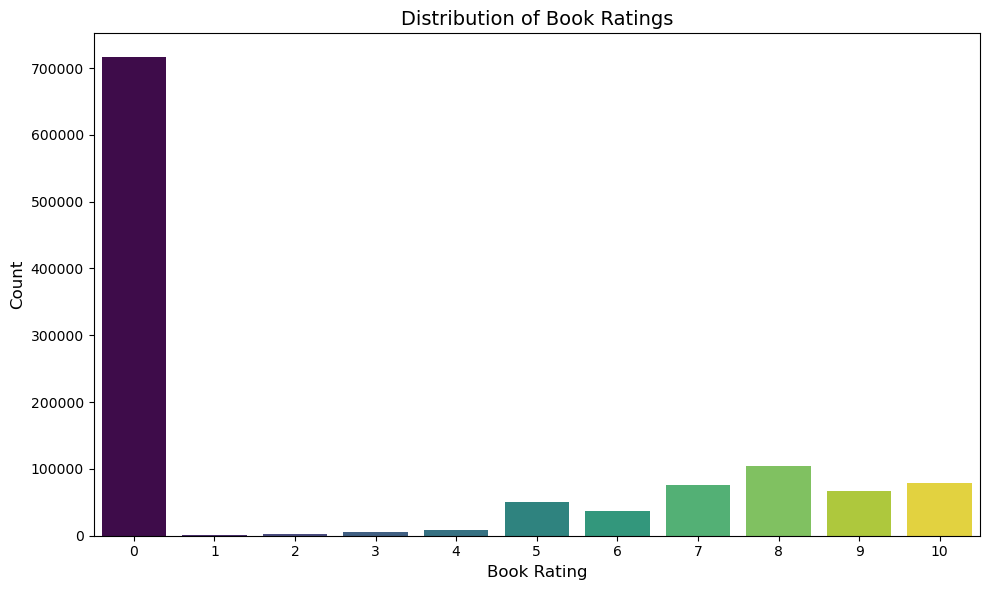

In [28]:
# 1. Distribution of Book Ratings
###########################################
plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=ratings_df, hue='Book-Rating', palette='viridis', legend=False)
plt.title('Distribution of Book Ratings', fontsize=14)
plt.xlabel('Book Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

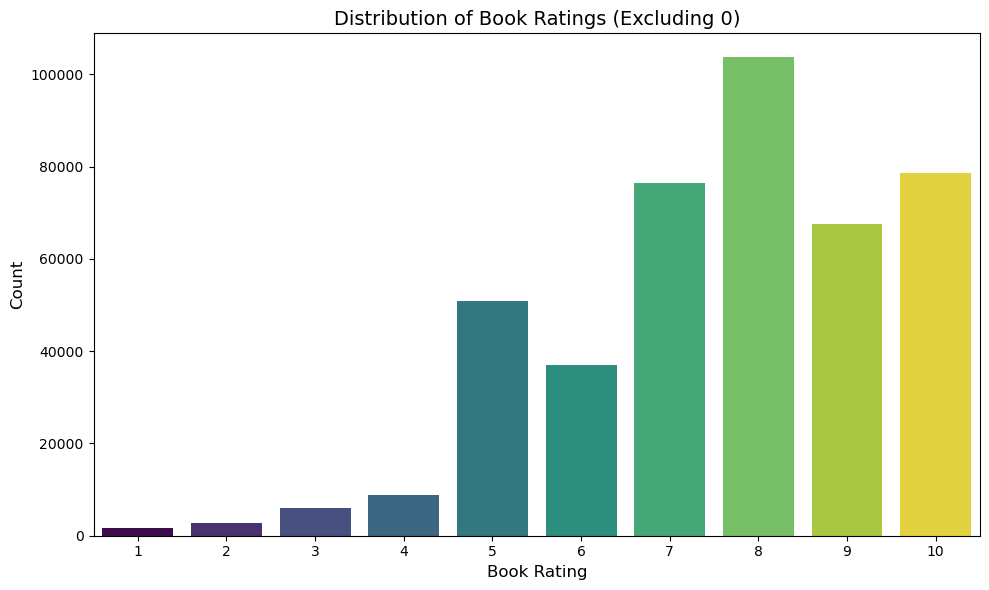

In [39]:
# Filter out ratings that are 0
filtered_ratings_df = ratings_df[ratings_df['Book-Rating'] != 0]

# Plot the distribution of book ratings excluding 0
plt.figure(figsize=(10, 6))
sns.countplot(x='Book-Rating', data=filtered_ratings_df, hue='Book-Rating', palette='viridis', legend=False)
plt.title('Distribution of Book Ratings (Excluding 0)', fontsize=14)
plt.xlabel('Book Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()

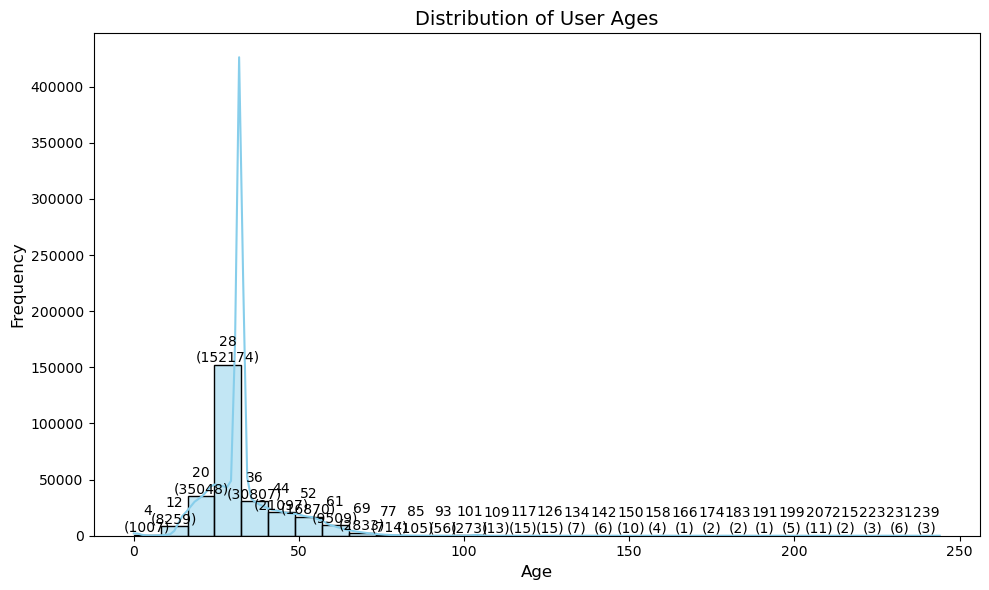

In [41]:
# 2. Distribution of User Ages
# Plot the distribution of user ages
plt.figure(figsize=(10, 6))
# Drop NaNs if any and plot histogram with KDE
ax = sns.histplot(users_df['Age'].dropna(), bins=30, kde=True, color='skyblue')

# Add numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(p.get_x() + p.get_width() / 2.)}\n({int(height)})', ha='center', va='bottom')

plt.title('Distribution of User Ages', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

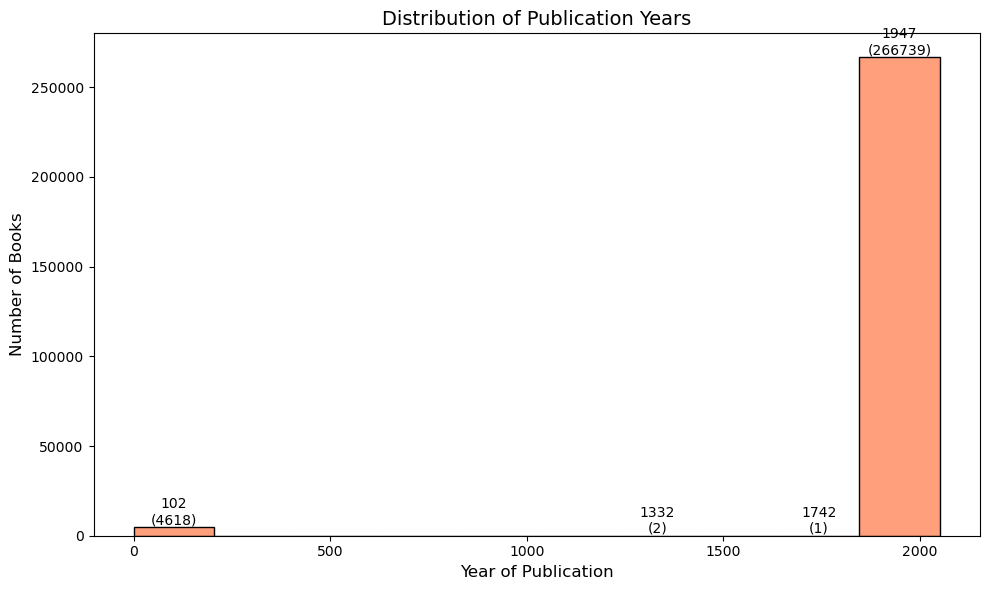

In [47]:
# 3. Distribution of Publication Years for Books
###########################################
# Plot the distribution of publication years for books
plt.figure(figsize=(10, 6))
# Convert 'Year-Of-Publication' to numeric, forcing errors to NaN if any
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')
ax = sns.histplot(books_df['Year-Of-Publication'].dropna(), bins=10, kde=False, color='coral')

# Add numbers on top of each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with height greater than 0
        ax.text(p.get_x() + p.get_width() / 2., height + 5, f'{int(p.get_x() + p.get_width() / 2.)}\n({int(height)})', ha='center', va='bottom')

plt.title('Distribution of Publication Years', fontsize=14)
plt.xlabel('Year of Publication', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.tight_layout()
plt.show()

/var/folders/26/00slbxsd34bg6pgc2vpx2k700000gn/T/ipykernel_35602/4029779070.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year-Of-Publication', y='Count', data=year_counts, palette='viridis')


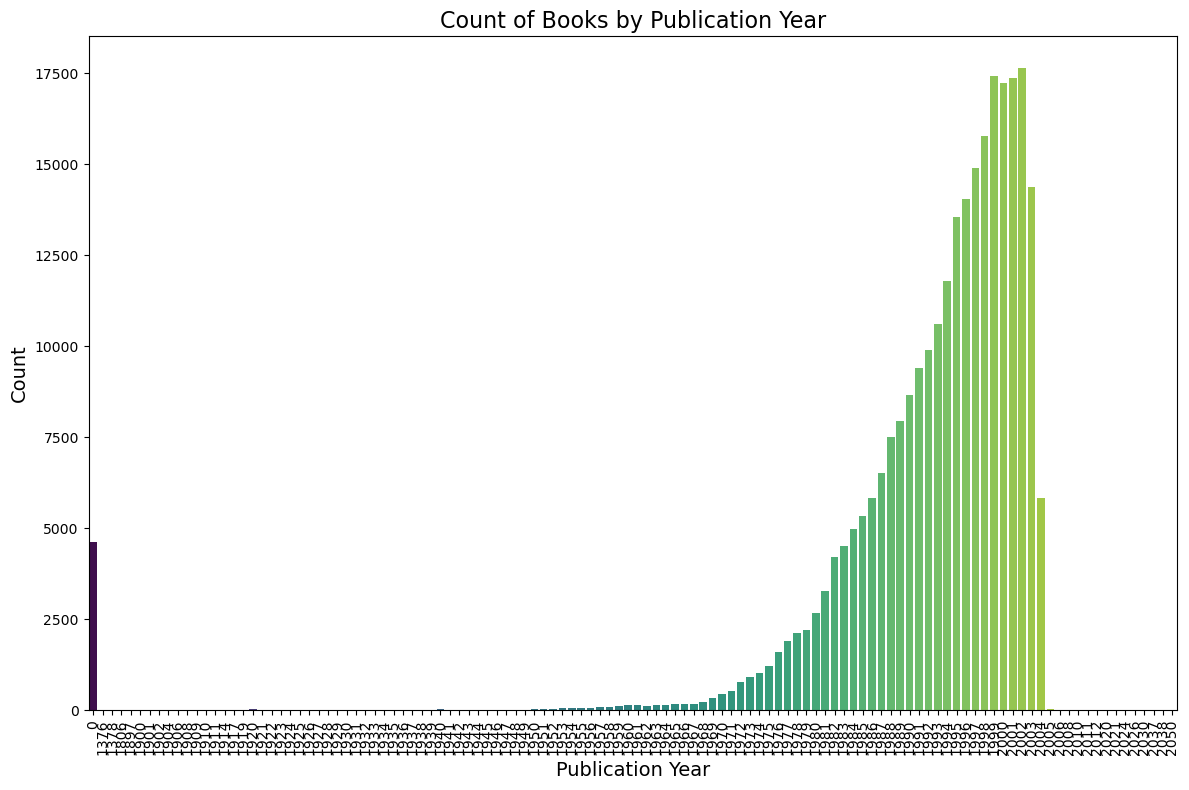

In [50]:
# Ensure 'Year-Of-Publication' is numeric.
books_df['Year-Of-Publication'] = pd.to_numeric(books_df['Year-Of-Publication'], errors='coerce')

# Group by publication year and count occurrences
year_counts = books_df.groupby('Year-Of-Publication').size().reset_index(name='Count')

# Create a bar plot to visualize the number of books published each year
plt.figure(figsize=(12, 8))
sns.barplot(x='Year-Of-Publication', y='Count', data=year_counts, palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Books by Publication Year', fontsize=16)
plt.xlabel('Publication Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.tight_layout()
plt.show()

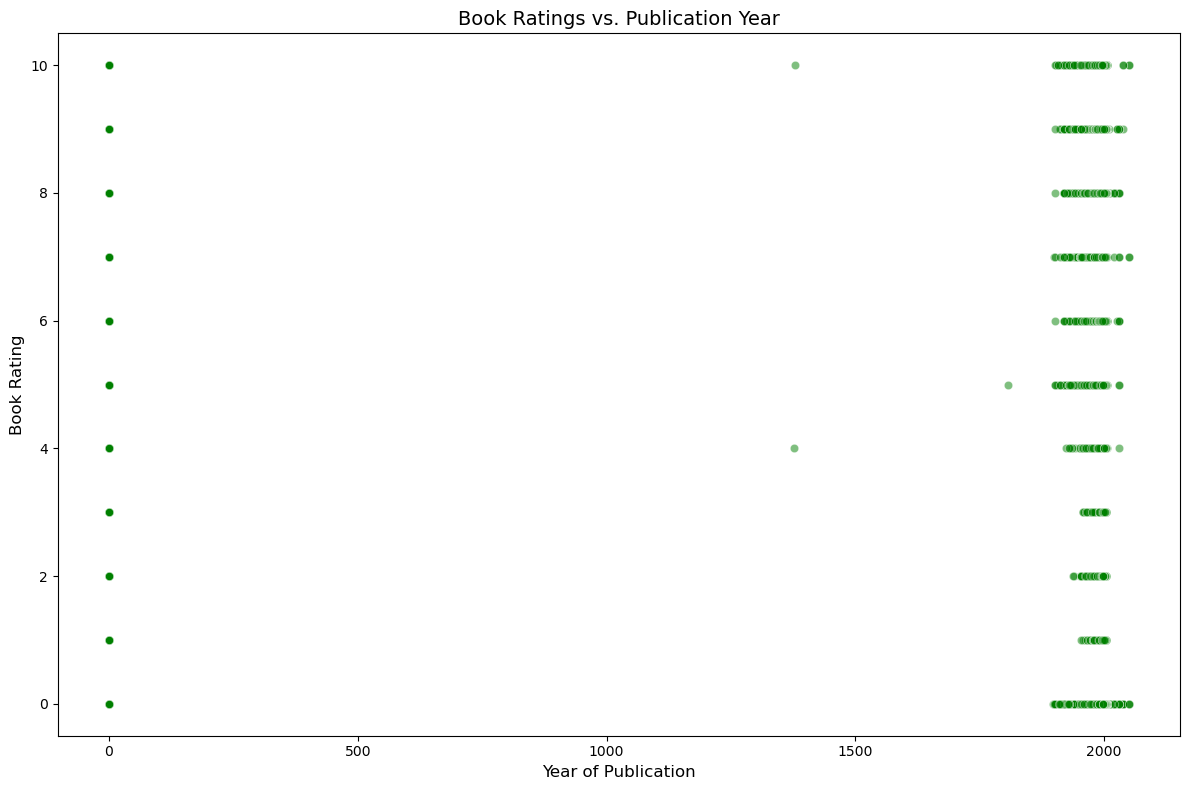

In [27]:
# 4. Relationship Between Book Publication Year and Rating
###########################################
plt.figure(figsize=(12, 8))
# Ensure 'Year-Of-Publication' is numeric in merged_df for filtering
merged_df['Year-Of-Publication'] = pd.to_numeric(merged_df['Year-Of-Publication'], errors='coerce')
# Filter merged_df to include only publication years that are in books_df
valid_years = books_df['Year-Of-Publication'].unique()
merged_df = merged_df[merged_df['Year-Of-Publication'].isin(valid_years)]
# Ensure 'Year-Of-Publication' is numeric in the merged DataFrame as well
merged_df['Year-Of-Publication'] = pd.to_numeric(merged_df['Year-Of-Publication'], errors='coerce')
sns.scatterplot(x='Year-Of-Publication', y='Book-Rating', data=merged_df, alpha=0.5, color='green')
plt.title('Book Ratings vs. Publication Year', fontsize=14)
plt.xlabel('Year of Publication', fontsize=12)
plt.ylabel('Book Rating', fontsize=12)
plt.tight_layout()
plt.show()

In [22]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",32.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",32.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",32.0
